<a href="https://colab.research.google.com/github/sjekic/DiabetesPrediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
from tabulate import tabulate

In [2]:
file_path = "diabetes.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    file_path,
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


<ipython-input-2-8e930b4e4e13>:2: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 23.3k/23.3k [00:00<00:00, 7.68MB/s]


In [3]:
print("First 5 records:\n")
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

First 5 records:

+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
+====+===============+===========+=================+=================+===========+=======+============================+=======+===========+
|  0 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|  1 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
| 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All data is numerical hence there will be no need for one-hot encoding.

In [5]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


From this illogical values can be:
- glucose (as below 54 is considered for need for immediate action, this is impossible)
- blood pressure
- skin thickness
- insulin
- BMI

As the total amount of rows is 768, simply deleting the rows with missing data (which would be at least 374) would seriously decrease the size of the dataset and harm the accuracy of the prediction. Instead it is better to impute it. Depending on what the histograms show, an imputation technique will be chosen.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
import numpy as np
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [10]:
df[columns_with_zeros] = df[columns_with_zeros].astype(float)

In [11]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


For the columns where there are illogical zeros we need to replace them with a NaN value because otherwise they will affect the mean/median used for imputing.

<Axes: >

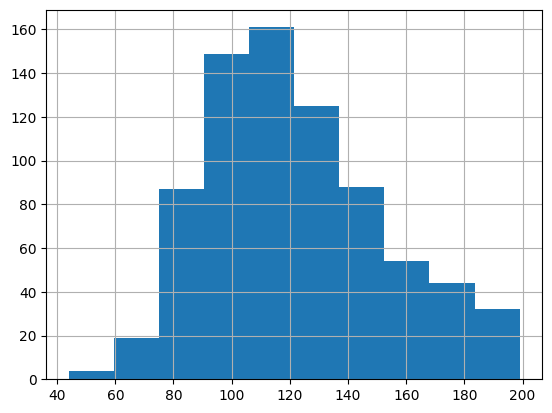

In [12]:
df['Glucose'].hist()

The median and the mean of glucose are very close in values, hence it is fine imputing it with either.

In [13]:
df["Glucose"]=df["Glucose"].replace(np.nan,df["Glucose"].mean())

<Axes: >

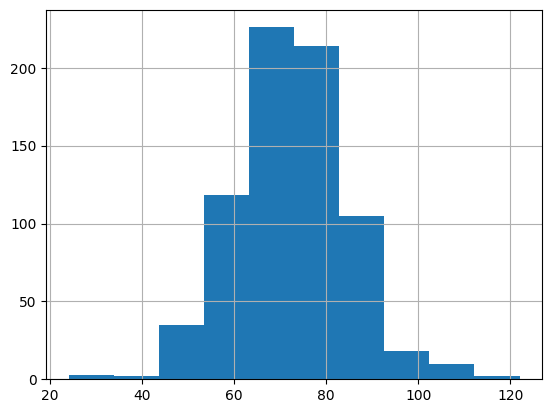

In [14]:
df["BloodPressure"].hist()

In [15]:
df["BloodPressure"]=df["BloodPressure"].replace(np.nan, df["BloodPressure"].mean())

<Axes: >

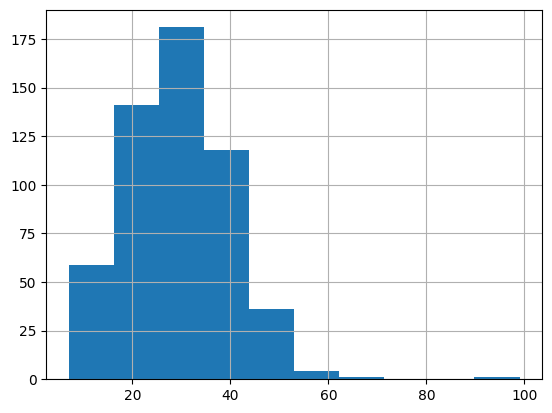

In [16]:
df["SkinThickness"].hist()

In [17]:
df["SkinThickness"]=df["SkinThickness"].replace(np.nan, df["SkinThickness"].mean())

<Axes: >

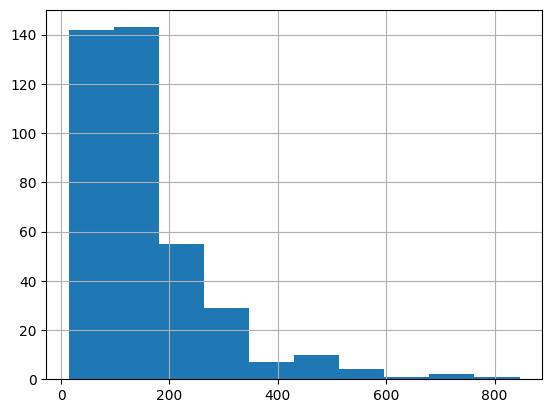

In [18]:
df["Insulin"].hist()

Based on the histogram we can see that most of the values of insulin are between ~20 to ~180. In general, values above 300 are considered rare and extreme and the ones above 400 can be removed. Furthermore I performed an outlier detection to confirm which values to remove.

In [19]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Lower bound: {lower_bound:.2f}")

Number of outliers: 24
Upper bound: 360.62
Lower bound: -94.38


Our upper bound based on outlier detection is 360 and the program computed 24 outliers. Since this is a small number of rows in comparison to the total, I will remove them from the dataset.

In [20]:
df = df[df["Insulin"]<upper_bound]

<Axes: >

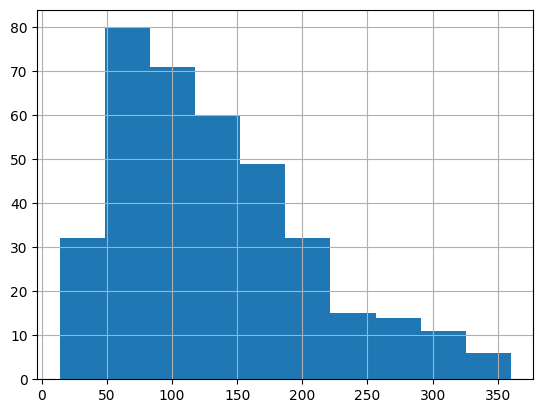

In [21]:
df["Insulin"].hist()

In [22]:
df["Insulin"] = df["Insulin"].replace(np.nan, df["Insulin"].median())

<Axes: >

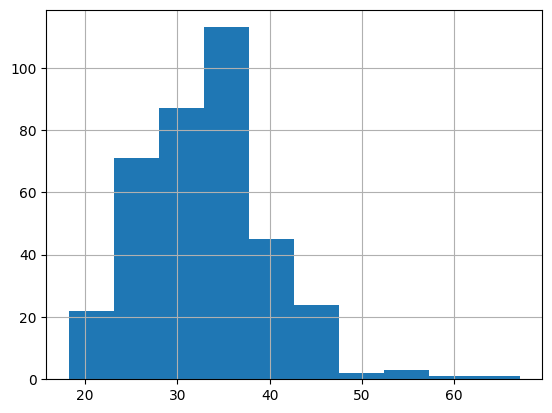

In [23]:
df["BMI"].hist()

In [24]:
df["BMI"]=df["BMI"].replace(np.nan,df["BMI"].mean())

In [25]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Now that we've removed and imputed missing data we can continue analyzing it.

In [26]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.686486
1,0.313514


<Axes: xlabel='Outcome', ylabel='count'>

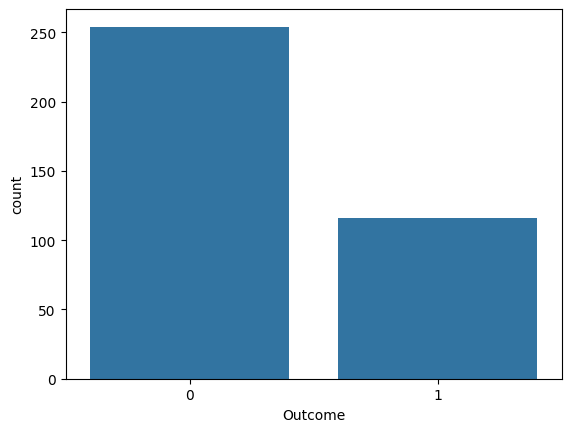

In [27]:
import seaborn as sns
sns.countplot(x='Outcome', data=df)

By checking the proportion of patients suffering from diabetes we can know if there is a class imbalance, because if there is we might get high accuracy just because most of the data i.e. 90% is only one class. Here there is no strong class imbalance as the number of patients with diabetes represents approximately 32% in comparison to patients without it at 68%.

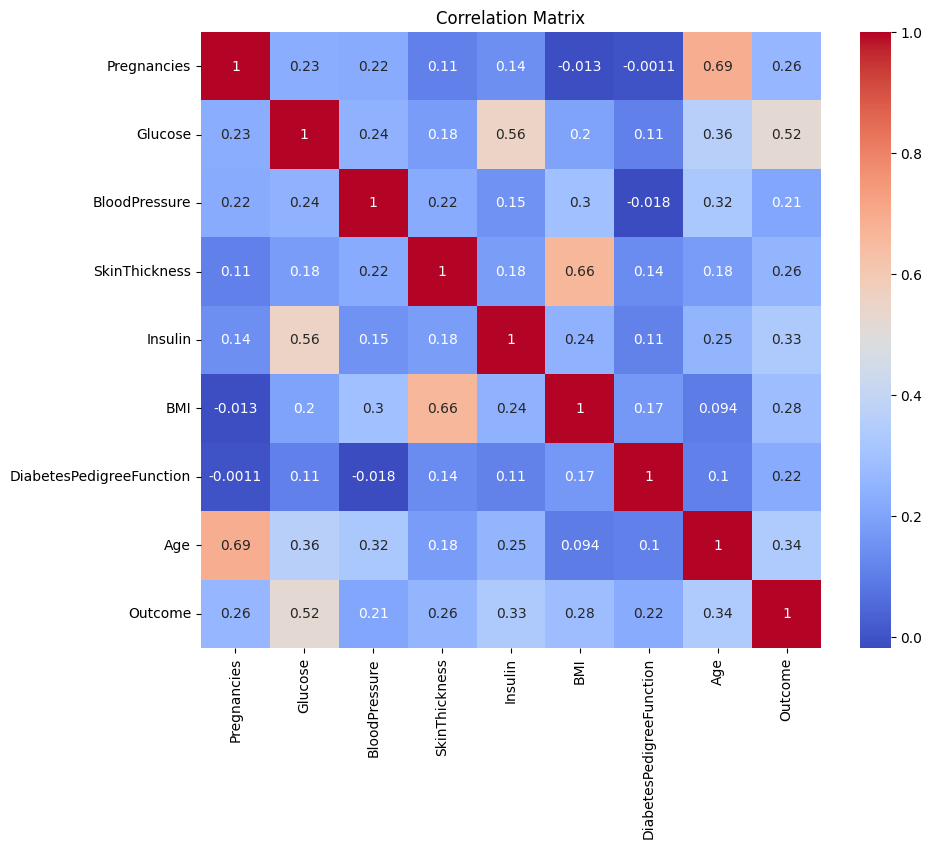

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Observing the correlation matrix we can conclude that age and pregnancies are correlated, but this is not strong correlation, as well as skin thickness and BMI. But what we truly want to pay attention to here is the correlation of predictive variables with the outcome.

The highest correlation index is with glucose, while the rest take values between 0.2 and 0.35. This means that a high glucose will most likely be an indicator of the person suffering from diabetes (as the correlation is positive).

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
 [[82 18]
 [26 28]]
ROC AUC Score: 0.8229629629629629


90% of non-diabetic patients and 70% of diabetic patients were guessed correctly. This means that 30% of the diabetic patients have gone under the radar which is dangerous as we want less false negatives. What might have caused this is the distribution of classes so the next approach is oversampling.

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_res, y_res)

LogisticRegression(max_iter=1000)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Confusion Matrix:
 [[76 24]
 [16 38]]
ROC AUC Score: 0.8203703703703704


Although it detects diabetics better now, the model has a lower accuracy and ROC AUC score.

In [36]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_predicted = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.7702702702702703

We would expect the random forest model to perform better than logistic regression as it is an ensemble model, however that is not the case. This might be because the training dataset is too small, so the model might overfit it. Because of this we will return to logistic regression, but focus more on the variables we use.

One of the potential causes of this is polynomial variables which require a non-linear decision boundary.

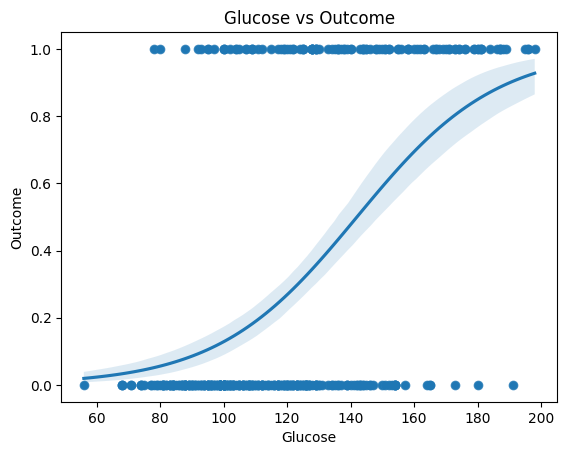

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X['Glucose'], y=y)
sns.regplot(x=X['Glucose'], y=y, logistic=True)
plt.title('Glucose vs Outcome')
plt.show()

Since Glucose has a positive correlation with the Outcome (0.59) we will check whether there is a linear or non-linear relationship between them. From the plot above, we can conclude that the lower values of glucose result in a negative outcome (no diabetes) and higher values of glucose in positive (diabetes). We can observe an S-curve or a sigmoid function which tells us that there is a non-linear relationship between this predictor and outcome.

The second highest correlation with Outcome is with Age (0.34) so we will try to combine these 2 features and see if the line fits the prediction better.

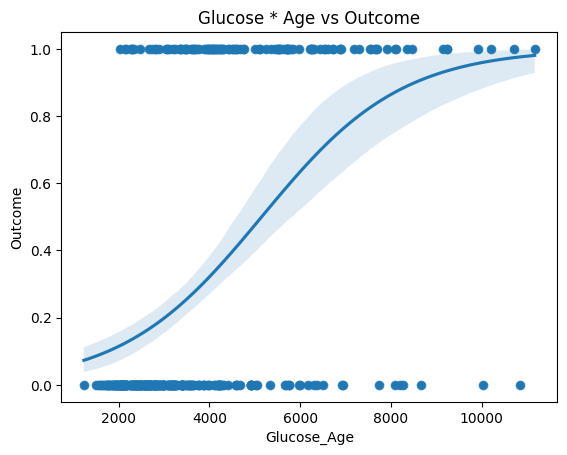

In [41]:
df['Glucose_Age']=df['Glucose']*df['Age']
sns.scatterplot(x=df['Glucose_Age'], y=df['Outcome'])
sns.regplot(x=df['Glucose_Age'], y=df['Outcome'], logistic=True)
plt.title("Glucose * Age vs Outcome")
plt.show()

After plotting Glucose and Age together we can conclude that it is better to use Glucose as a feature as it is, alone.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(poly.get_feature_names_out())

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Pregnancies^2' 'Pregnancies Glucose'
 'Pregnancies BloodPressure' 'Pregnancies SkinThickness'
 'Pregnancies Insulin' 'Pregnancies BMI'
 'Pregnancies DiabetesPedigreeFunction' 'Pregnancies Age' 'Glucose^2'
 'Glucose BloodPressure' 'Glucose SkinThickness' 'Glucose Insulin'
 'Glucose BMI' 'Glucose DiabetesPedigreeFunction' 'Glucose Age'
 'BloodPressure^2' 'BloodPressure SkinThickness' 'BloodPressure Insulin'
 'BloodPressure BMI' 'BloodPressure DiabetesPedigreeFunction'
 'BloodPressure Age' 'SkinThickness^2' 'SkinThickness Insulin'
 'SkinThickness BMI' 'SkinThickness DiabetesPedigreeFunction'
 'SkinThickness Age' 'Insulin^2' 'Insulin BMI'
 'Insulin DiabetesPedigreeFunction' 'Insulin Age' 'BMI^2'
 'BMI DiabetesPedigreeFunction' 'BMI Age' 'DiabetesPedigreeFunction^2'
 'DiabetesPedigreeFunction Age' 'Age^2']


In [43]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [44]:
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [45]:
scores = cross_val_score(pipeline_poly, X, y, cv=5, scoring='accuracy')

print("Mean accuracy with polynomial features:", scores.mean())

Mean accuracy with polynomial features: 0.7891891891891892


In [46]:
pipeline_plain = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

scores_plain = cross_val_score(pipeline_plain, X, y, cv=5, scoring='accuracy')

print("Mean accuracy without polynomial features:", scores_plain.mean())

Mean accuracy without polynomial features: 0.7837837837837838


In [47]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(poly.get_feature_names_out())

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Pregnancies^2' 'Pregnancies Glucose'
 'Pregnancies BloodPressure' 'Pregnancies SkinThickness'
 'Pregnancies Insulin' 'Pregnancies BMI'
 'Pregnancies DiabetesPedigreeFunction' 'Pregnancies Age' 'Glucose^2'
 'Glucose BloodPressure' 'Glucose SkinThickness' 'Glucose Insulin'
 'Glucose BMI' 'Glucose DiabetesPedigreeFunction' 'Glucose Age'
 'BloodPressure^2' 'BloodPressure SkinThickness' 'BloodPressure Insulin'
 'BloodPressure BMI' 'BloodPressure DiabetesPedigreeFunction'
 'BloodPressure Age' 'SkinThickness^2' 'SkinThickness Insulin'
 'SkinThickness BMI' 'SkinThickness DiabetesPedigreeFunction'
 'SkinThickness Age' 'Insulin^2' 'Insulin BMI'
 'Insulin DiabetesPedigreeFunction' 'Insulin Age' 'BMI^2'
 'BMI DiabetesPedigreeFunction' 'BMI Age' 'DiabetesPedigreeFunction^2'
 'DiabetesPedigreeFunction Age' 'Age^2']


After trying out various combinations of polynomial features we get an extremely small difference in the mean accuracy with and without them: 0.789 and 0.783. To keep things simpler, I decided to stick with the variables as they are without overcomplicating with polynomial combinations.

But still, a ROC AUC score of 0.86 isn't good enough for a healthcare-related project so I decided to switch from a data-based strategy to a medical one. According to the Mayo Clinic, if a patient exhibits:
- Glucose above 100 is considered prediabetic and above 126 (on 2 test) is diabetic
- If they are above the age of 35 they are more likely to have diabetes type 2
- BMI above 30

In [48]:
df['high_glucose'] = (df['Glucose'] > 126).astype(int)
df['obese'] = (df['BMI'] >= 30).astype(int)
df['age_35plus'] = (df['Age'] >= 35).astype(int)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X_new = df[['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction','high_glucose', 'obese', 'age_35plus']]
y = df['Outcome']

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_new, y, cv=5, scoring='accuracy')
print("Accuracy with domain features:", scores.mean())


Accuracy with domain features: 0.7945945945945946


In [50]:
X_new.describe()


,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,DiabetesPedigreeFunction,high_glucose,obese,age_35plus
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,119.993748,32.888618,30.637838,70.643243,132.610811,28.864865,0.520235,0.359459,0.654054,0.270270
std,29.395483,7.008364,10.008055,12.498120,74.285393,10.478943,0.332846,0.480492,0.476320,0.444701
min,56.000000,18.200000,21.000000,24.000000,14.000000,7.000000,0.085000,0.000000,0.000000,0.000000
25%,99.000000,27.925000,23.000000,62.000000,75.000000,21.000000,0.273000,0.000000,0.000000,0.000000
50%,117.000000,33.000000,27.000000,70.000000,120.000000,29.000000,0.449500,0.000000,1.000000,0.000000
75%,138.750000,36.875000,36.000000,78.000000,177.500000,36.000000,0.685750,1.000000,1.000000,1.000000
max,198.000000,67.100000,81.000000,110.000000,360.000000,63.000000,2.420000,1.000000,1.000000,1.000000


In [51]:
continuous_features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']
binary_features = ['high_glucose', 'obese', 'age_35plus']

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features)
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('pre', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

scores = cross_val_score(pipe, df[continuous_features + binary_features], y, cv=5, scoring='accuracy')
print("Accuracy with partial scaling:", scores.mean())

Accuracy with partial scaling: 0.7810810810810811
